REGRESSION - STUDENT GRADE PREDICTION PPT

---


Link:https://drive.google.com/file/d/1fnw7YgQxlk9JuWFda5eDMYm-ykC9Xj-9/view?usp=drivesdk

REGRESSION - STUDENT GRADE PREDICTION

Description : The data contains details of students in a Portuguese school. Depending on 30 input variables you have to predict grades of students Objective Predict student performance

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importing given csv file data

In [ ]:
df = pd.read_csv("/content/regressiondata.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


here we are considering the average of g1,g2,g3 so that we can get our target variable

In [ ]:
# Calculate the mean grade and round it to the nearest integer
df['meangrade'] = df[['G1', 'G2', 'G3']].mean(axis=1).round()


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,meangrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,6.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,15.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,9.0


It returns a list of column names that can be used to reference and manipulate the data within the DataFrame.

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'meangrade'],
      dtype='object')

In [ ]:
df.shape

(395, 34)

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,meangrade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.660759
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.719390
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [ ]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
meangrade     0
dtype: int64

In [ ]:
df.isnull().values.any()

False

Grades according to the number of students who scored them

the code creates a horizontal bar plot that visualizes the distribution of final grades for students. Each bar represents a grade, and the length of the bar corresponds to the number of students who scored that grade.

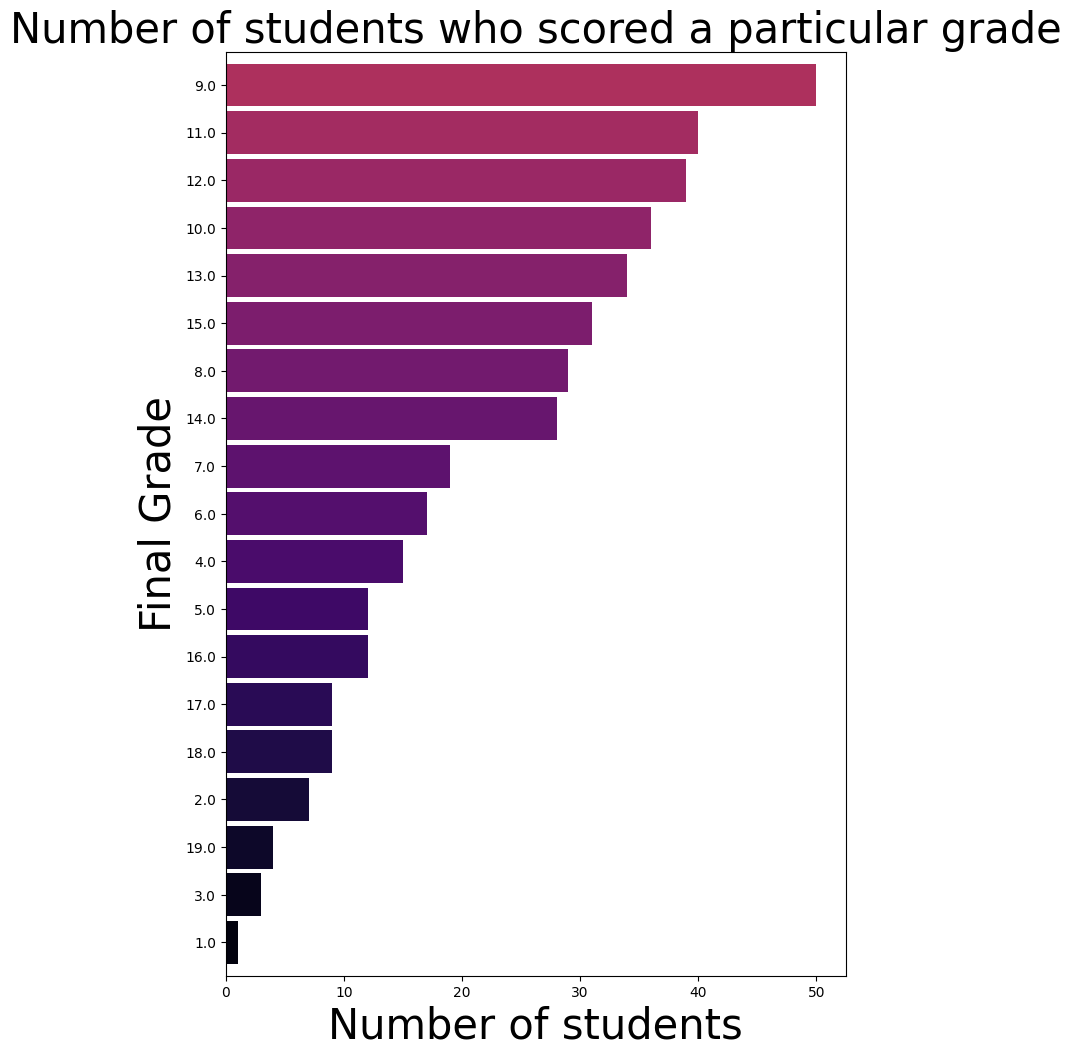

In [ ]:
plt.subplots(figsize=(8,12))
grade_counts = df['meangrade'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()

**Student's Sex**

In [ ]:
f_stud = len(df[df['sex'] == 'F'])    # Number of female students
print('Number of female students:',f_stud)
m_stud = len(df[df['sex'] == 'M'])    # Number of male students
print('Number of male students:',m_stud)

Number of female students: 208
Number of male students: 187


<Axes: xlabel='sex', ylabel='count'>

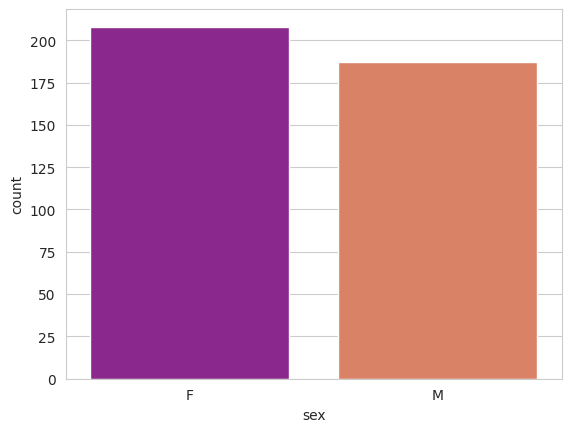

In [ ]:
sns.set_style('whitegrid')    # male & female student representaion on countplot
sns.countplot(x='sex',data=df,palette='plasma')

Observation:The gender distribution is pretty even.

**Age of Students**

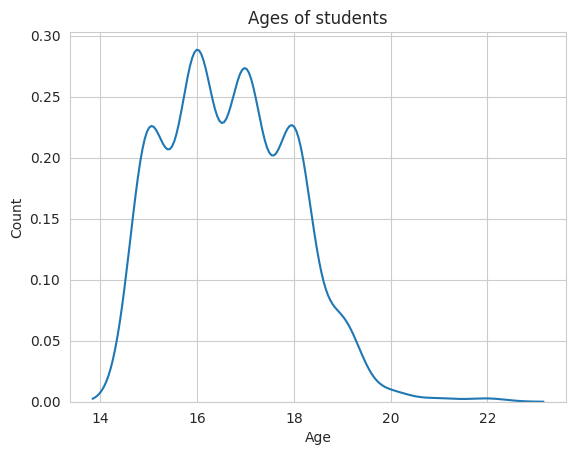

In [ ]:
b = sns.kdeplot(df['age'])    # Kernel Density Estimations
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

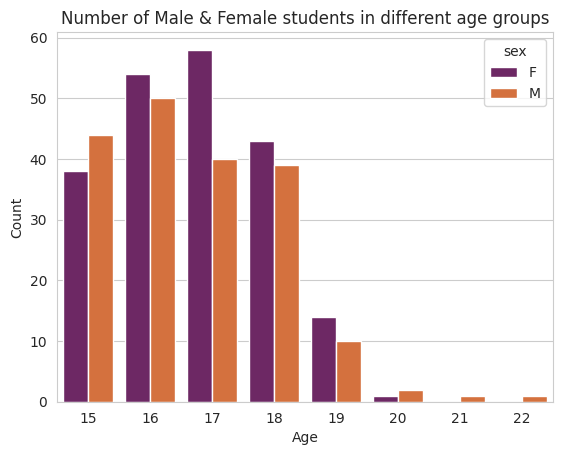

In [ ]:
b = sns.countplot(x='age',hue='sex', data=df, palette='inferno')
b.axes.set_title('Number of Male & Female students in different age groups')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

Observation:The student age seems to be ranging from 15-19, where gender distribution is pretty even in each age group.

**Students from Urban & Rural Areas**

In [ ]:
u_stud = len(df[df['address'] == 'U'])    # Number of urban areas students
print('Number of Urban students:',u_stud)
r_stud = len(df[df['address'] == 'R'])    # Number of rural areas students
print('Number of Rural students:',r_stud)

Number of Urban students: 307
Number of Rural students: 88


<Axes: xlabel='address', ylabel='count'>

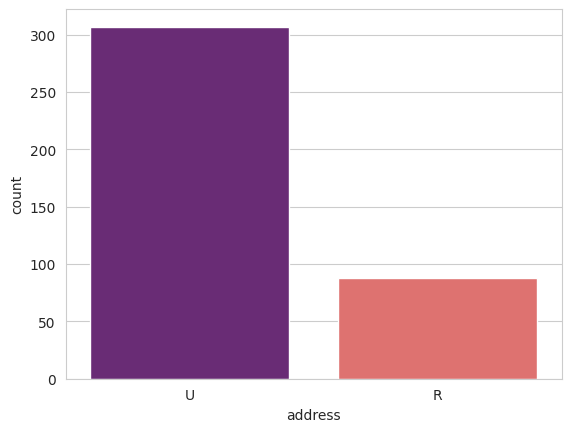

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='address',data=df,palette='magma')    # urban & rural representaion on countplot

Observation:Approximately 77.72% students come from urban region and 22.28% from rural region.

1. Does age affect final grade?

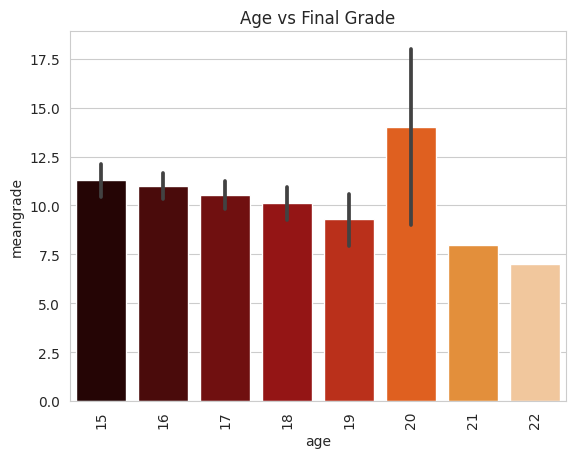

In [ ]:
# Create a bar plot of 'age' vs 'G3'
sns.barplot(x='age', y='meangrade', data=df, palette='gist_heat')
plt.title('Age vs Final Grade')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

The above plot shows that the median grades of the three age groups(15,16,17) are similar. Age group 20 seems to score highest grades among all.

2. Do urban students perform better than rural students?

<ipython-input-23-0831b4ff4a89>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['address'] == 'U', 'meangrade'], label='Urban', shade = True)
<ipython-input-23-0831b4ff4a89>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['address'] == 'R', 'meangrade'], label='Rural', shade = True)


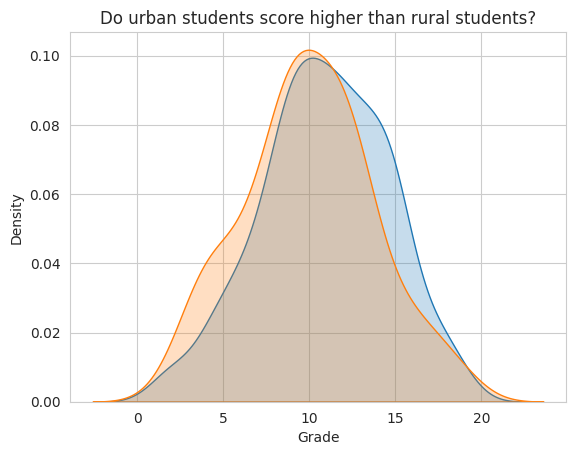

In [ ]:
# Grade distribution by address
sns.kdeplot(df.loc[df['address'] == 'U', 'meangrade'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'meangrade'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?')
plt.xlabel('Grade');
plt.ylabel('Density')
plt.show()

The above graph clearly shows there is not much difference between the grades based on location.

**Failure Attribute**

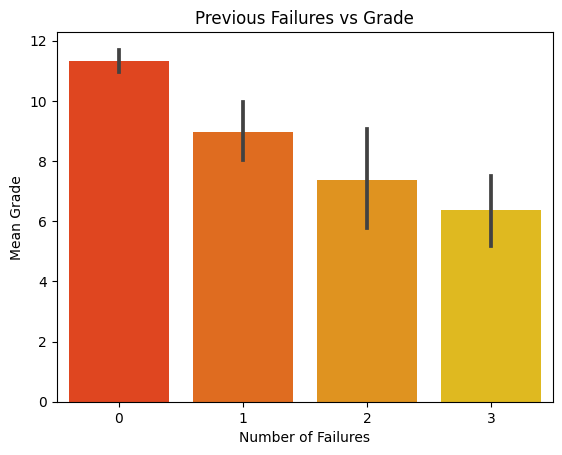

In [ ]:
# Create a bar plot of 'failures' vs the mean 'mean grade'
sns.barplot(x='failures', y='meangrade', data=df, palette='autumn')
plt.title('Previous Failures vs Grade')
plt.xlabel('Number of Failures')
plt.ylabel('Mean Grade')
plt.show()


Observation:Student with less previous failures usually score higher

**Family Education Attribute ( Fedu + Medu )**

Text(0, 0.5, ' Grade')

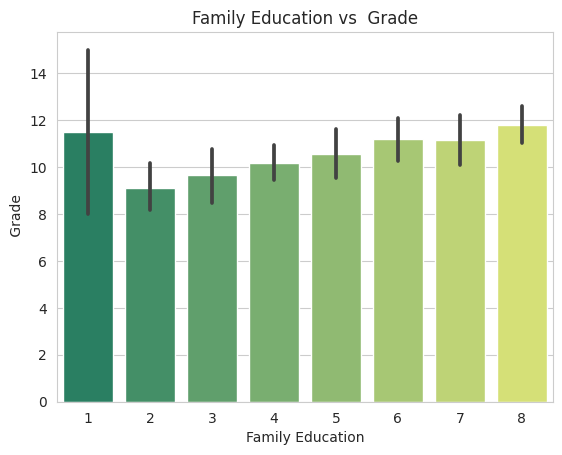

In [ ]:
# Create a bar plot of 'Family Education' vs 'mean grade'
fa_edu = df['Fedu'] + df['Medu']
sns.barplot(x=fa_edu, y=df['meangrade'], palette='summer')
plt.title('Family Education vs  Grade')
plt.xlabel('Family Education')
plt.ylabel(' Grade')

Observation:Educated families result in higher grades

**Wish to go for Higher Education Attribute**

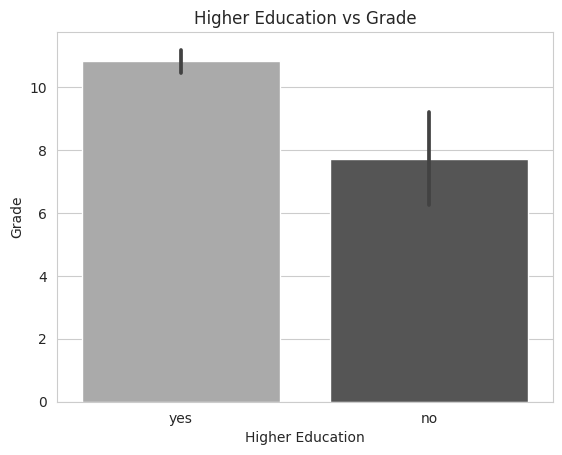

In [ ]:
# Create a bar plot of 'Higher Education' vs 'mean grade'
sns.barplot(x='higher', y='meangrade', data=df, palette='binary')
plt.title('Higher Education vs Grade')
plt.xlabel('Higher Education')
plt.ylabel('Grade')
plt.show()

Observation:Students who wish to go for higher studies score more

**Going Out with Friends Attribute**

Text(0.5, 1.0, 'Go Out vs Final Grade')

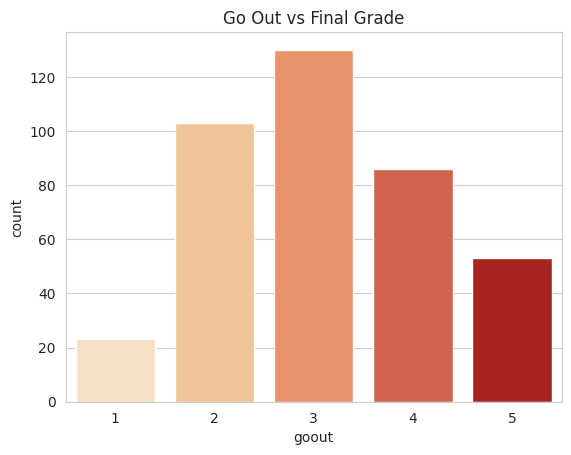

In [ ]:
b = sns.countplot(x=df['goout'],palette='OrRd')
b.axes.set_title('Go Out vs Final Grade')

Observation:The students have an average score when it comes to going out with friends.

**Romantic relationship Attribute**

Text(0, 0.5, 'Grade')

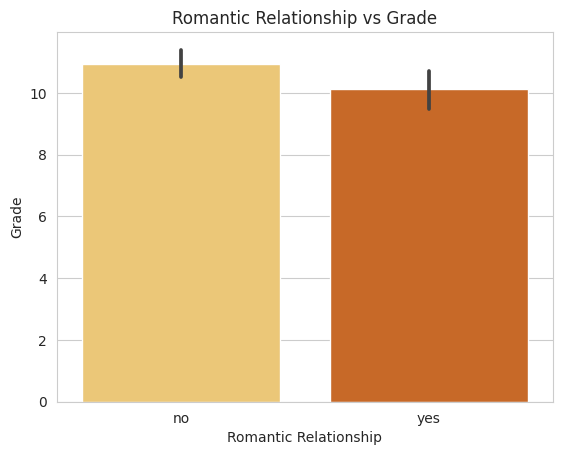

In [ ]:
# Create a bar plot of 'Romantic Relationship' vs 'mean grade'
sns.barplot(x='romantic', y='meangrade', data=df, palette='YlOrBr')
plt.title('Romantic Relationship vs Grade')
plt.xlabel('Romantic Relationship')
plt.ylabel('Grade')

**Reason Attribute**

Text(0.5, 1.0, 'Reason vs Students Count')

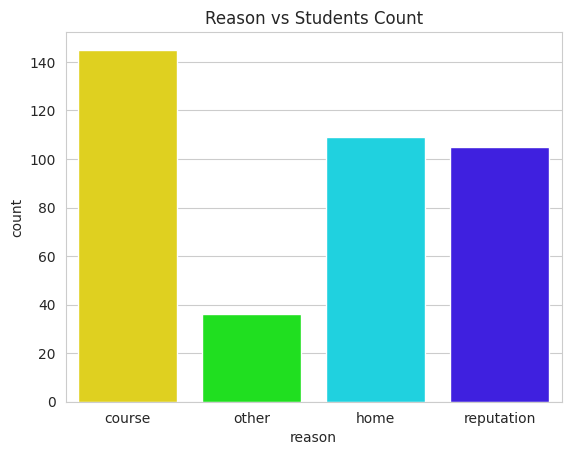

In [ ]:
b = sns.countplot(x='reason',data=df,palette='gist_rainbow')    # Reason to choose this school
b.axes.set_title('Reason vs Students Count')

Observation: The students have an equally distributed average score when it comes to reason attribute.

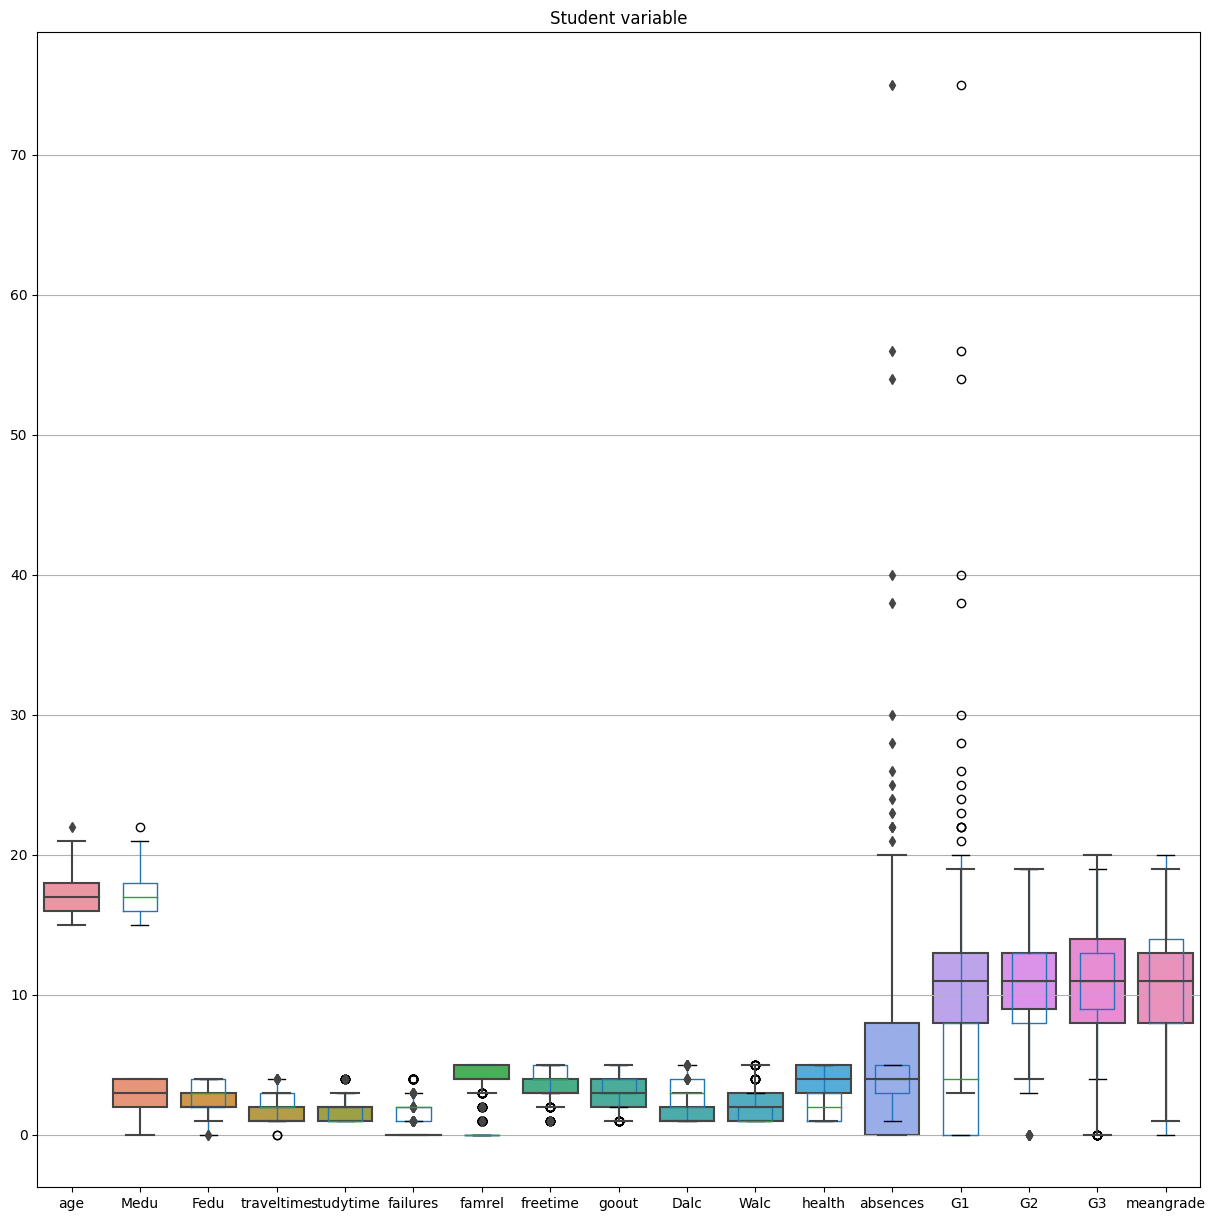

In [ ]:
df.boxplot(figsize=(15,15))
sns.boxplot(data=df)
plt.title('Student variable')
plt.show()

The box plot shows a slight outlier in  absences and G1, which does not significantly impact on our data, so it was considered.

**CORRELATION MATRIX**

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')


<ipython-input-24-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


however we observed that there is strong postive coorelation occurs in G1,G2,G3
. 0   indicates no linear correlation
. -1  indicates perfect negative correlation
. 1   indicates perfect postive correlation









In [ ]:
df_cat = df.select_dtypes(np.object)
df_cat

<ipython-input-42-66775d69e6bc>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = df.select_dtypes(np.object)


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [ ]:
categorical_cols = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

In [ ]:
for col in categorical_cols:
  print(col,df[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


Multicollinearity: It is a statistical term that refers to the existence of a high degree of correlation between two or more independent variables in a multiple regression analysis.

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,school,1.596951
1,sex,2.823063
2,age,93.758888
3,address,1.782420
4,famsize,1.617933
5,Pstatus,10.896473
6,Medu,21.420601
7,Fedu,13.537624
8,traveltime,6.745546
9,studytime,9.613799


DUMMY VARIABLE

In [ ]:
df['school'].replace(['GP','MS'],[0,1],inplace=True)
df['sex'].replace(['F','M'],[0,1],inplace=True)
df['address'].replace(['U', 'R'],[0,1],inplace=True)
df['famsize'].replace(['GT3', 'LE3'],[0,1],inplace=True)
df['Pstatus'].replace(['A', 'T'],[0,1],inplace=True)
df['schoolsup'].replace(['no', 'yes'],[0,1],inplace=True)
df['famsup'].replace(['no', 'yes'],[0,1],inplace=True)
df['paid'].replace(['no', 'yes'],[0,1],inplace=True)
df['activities'].replace(['no', 'yes'],[0,1],inplace=True)
df['nursery'].replace(['no', 'yes'],[0,1],inplace=True)
df['higher'].replace(['no', 'yes'],[0,1],inplace=True)
df['internet'].replace(['no', 'yes'],[0,1],inplace=True)
df['romantic'].replace(['no', 'yes'],[0,1],inplace=True)

In [ ]:
# Create a mapping for job levels
job_mapping = {
    'teacher': 1,   # Highest job level
    'health': 1,    # Highest job level
    'services': 1,  # Lower job level
    'at_home': 0,   # Lower job level
    'other': 0      # Lower job level
}

# Apply the mapping to 'Mjob' and 'Fjob' columns
df['Mjob_level'] = df['Mjob'].map(job_mapping)
df['Fjob_level'] = df['Fjob'].map(job_mapping)

In [ ]:
dummy = pd.get_dummies(df,drop_first = True)
dummy

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,0,0,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,0,0,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,0,1,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,0,0,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,0,0,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,1,2,...,0,0,0,1,0,0,0,0,0,1
391,1,1,17,0,1,1,3,1,2,1,...,0,0,0,1,0,0,0,0,1,0
392,1,1,21,1,0,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
393,1,1,18,1,1,1,3,2,3,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
dummy.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'meangrade', 'Mjob_level', 'Fjob_level', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'],
      dtype='object')

**PREPARING TRAINING AND TESTING DATA**

In [ ]:
p_cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Mjob_level','G1', 'G2',
       'Fjob_level', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other']

In [ ]:
X = dummy[p_cols]
y = dummy.G3

**MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((316, 43), (79, 43))

**DECISION TREE**

In [ ]:
# Import necessary libraries

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Create a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()

# Train the model
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Calculate and print metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1.3164556962025316
Mean Squared Error (MSE): 6.6075949367088604
R-squared (R2): 0.6777576344825431


SVR



In [ ]:
from sklearn.svm import SVR
# Create an SVR model with your choice of kernel (e.g., 'linear', 'rbf', 'poly')
svr = SVR(kernel='rbf')



Feature Scaling: SVRs are sensitive to the scale of the features. It's often a good idea to scale or normalize your features. You can use StandardScaler from Scikit-Learn to do this.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svr.fit(X_train_scaled, y_train)

SVR()

In [ ]:
y_pred = svr.predict(X_test_scaled)
y_pred

array([ 8.58248264, 10.60395304,  5.53435271, 10.63032733,  9.89771092,
       11.81421221, 15.80044753,  8.72280258,  8.92273734, 11.68974025,
       14.31837896,  8.44967094, 12.59529517, 11.08002677, 13.7950149 ,
       10.22243124,  8.48217654, 10.93513454, 14.00361723,  9.3952251 ,
       13.88976838, 12.33892071, 14.03331682,  8.53693321,  9.70654243,
       16.01326116, 11.92312124, 10.29635884, 13.93811206, 11.37687503,
        9.34687822,  8.83555036, 14.96477058, 11.33130049,  7.62514342,
        8.06265282,  7.0018684 , 12.08057209, 12.02367063,  8.59066731,
        7.86740508, 10.46101248, 13.09846856,  8.51273375, 14.05758543,
       11.0852105 , 10.95398229, 12.08468041, 10.82037354, 14.36801426,
       12.85520573, 14.45630241, 11.47987574,  9.37625663,  7.81746051,
       10.81007895, 11.51466274,  8.031163  , 14.32249526, 15.65429665,
       11.60321317,  9.09774571,  8.2247774 ,  6.59841718,  8.43381541,
       14.4069564 ,  8.52861938,  9.69436624,  9.76145738, 15.19

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)


# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 1.8628192936397936
Mean Squared Error: 7.549700295899693
Root Mean Squared Error: 2.7476717955206538
R-squared (R²): 0.6318125875448537


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((316, 43), (79, 43))

In [ ]:
# Create a KNNR model with the desired number of neighbors (k)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn_regressor.predict(X_test_scaled)
y_pred

array([ 3.4, 10. ,  6. , 11.2,  9.4,  9.2, 15.8, 11. ,  9.2, 13.2, 14.2,
        9.6, 11.8,  8.4, 13. , 10.4,  8.8, 10.4, 12.8,  8.8, 12.8, 14. ,
       11.8,  6.4,  9.2, 13.4, 10.4, 12.4, 13.8, 10.8, 10.2,  9.6, 15.2,
       10.4,  8.2,  7.2,  0. , 10.4, 11.6,  7.8,  8.6,  8. , 12.8,  9.2,
       12.6,  9. ,  8.6,  8.6,  7.4, 14.2,  9.4, 15.4, 11.6,  9.4, 10.4,
       11.2, 12.4, 10.8, 12.2, 14. ,  9.2,  8. ,  3.2, 11.8,  7. , 12.4,
       11.6, 11.6, 10.2, 14.4, 11. , 10.8, 11.2, 15.4,  8.8,  9.2, 10. ,
       12. ,  5.4])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)


print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)


Mean Absolute Error: 2.6658227848101266
Mean Squared Error: 12.442025316455696
Root Mean Squared Error: 3.527325518924458
R-squared (R²): 0.3932213296658644


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((316, 43), (79, 43))

In [ ]:
# Create a Random Forest Regressor model with the desired number of trees (n_estimators)
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = random_forest.predict(X_test)
y_pred

array([ 8.23, 11.59,  6.91,  9.74,  8.68, 12.79, 18.71,  7.24,  7.2 ,
       13.39, 15.61,  7.22, 14.06, 11.89, 14.12,  7.93,  1.07, 10.54,
       15.39,  5.07, 14.23, 15.67, 15.33,  6.21,  5.53, 18.39, 10.61,
        9.74, 18.17, 10.49,  8.41,  8.75, 15.37, 13.13,  0.63,  6.64,
        0.06, 14.86, 11.91,  7.88,  6.19, 10.42, 14.06,  8.5 , 14.84,
        6.4 , 11.61, 14.17, 12.73, 15.52, 13.39, 15.32, 10.46,  8.78,
        6.17, 13.31, 10.77,  1.  , 15.58, 15.95, 13.42,  8.89,  8.4 ,
        6.52,  7.5 , 18.2 ,  9.27,  9.29,  9.33, 15.32,  8.24, 10.07,
       13.66, 18.34, 10.75,  5.81,  9.04, 14.15,  6.11])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)




print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 1.1388607594936706
Mean Squared Error: 3.6535708860759493
Root Mean Squared Error: 1.9114316325926881
R-squared (R²): 0.8218208991029288


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

((316, 43), (79, 43))

In [ ]:
# Create a Gradient Boosting Regressor model with desired hyperparameters
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
y_pred = gbr.predict(X_test)
y_pred

array([ 9.68769904, 11.47208454,  5.39910119,  9.924229  ,  9.29576929,
       11.98643661, 18.21330585,  7.54124686,  5.87832165, 12.88348889,
       15.18679046,  7.01785606, 13.83577552, 11.78475077, 14.52013819,
        8.79741395,  0.45174456, 10.94622204, 13.83194667,  5.31686615,
       13.83745127, 15.63149871, 14.50670392,  6.03953783,  7.43881731,
       18.94082249, 11.17874031, 10.35070164, 17.73197465, 12.27112674,
        7.50608619,  9.17289016, 15.31955682, 12.68708825, -0.30228558,
        6.67959094, -0.44547949, 15.36711449, 12.09773235,  9.20873102,
        6.62745101, 10.712665  , 14.75602345,  8.98348194, 14.98215107,
        7.81513259, 11.31335289, 14.26422586, 11.7336282 , 15.75151913,
       13.53405178, 15.41533614, 10.81876173,  8.99256171,  6.11485541,
       12.32064134, 10.5588313 ,  0.79804818, 15.40572131, 15.70108809,
       12.69971548,  9.5956304 ,  9.32328773,  6.07680175,  7.1901843 ,
       17.41932256,  9.01230126,  9.25789515,  9.50201705, 15.46

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 1.1488906661182574
Mean Squared Error: 4.016157848700478
Root Mean Squared Error: 2.0040353910798276
R-squared (R²): 0.8041380838485006


**XG BOOST**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((316, 43), (79, 43))

In [ ]:
xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage used in boosting
    max_depth=3,  # Maximum depth of trees
    random_state=0  # Seed for reproducibility
)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_pred = xgb_regressor.predict(X_test)
y_pred

array([ 9.21403   , 11.408833  ,  6.3264637 , 10.22239   ,  9.202311  ,
       12.132631  , 17.58929   ,  7.620867  ,  5.797041  , 12.942378  ,
       15.045208  ,  7.126909  , 13.883117  , 11.785032  , 14.429223  ,
        8.940285  ,  0.6555328 , 10.991317  , 14.285768  ,  5.266863  ,
       14.151211  , 15.288956  , 14.431213  ,  6.7090464 ,  7.0285935 ,
       18.634884  , 11.431688  ,  9.734718  , 17.505138  , 11.536704  ,
        8.976168  ,  8.553067  , 15.474568  , 12.619697  , -0.13272938,
        6.637204  , -0.67479104, 15.205251  , 12.194142  ,  9.009163  ,
        6.4410768 , 10.92102   , 14.460859  ,  9.124025  , 15.234059  ,
        8.315973  , 11.437657  , 14.273547  , 11.928695  , 15.701885  ,
       13.628091  , 15.486404  , 10.404505  ,  9.211746  ,  6.530792  ,
       12.438745  , 10.492668  ,  0.8043317 , 15.029443  , 15.355209  ,
       12.819008  ,  9.737628  ,  9.5638895 ,  6.057477  ,  6.79648   ,
       17.663824  ,  9.089229  ,  9.092656  ,  9.866384  , 15.15

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 1.2066413967669765
Mean Squared Error: 3.95057183921057
Root Mean Squared Error: 1.9876045479950406
R-squared (R²): 0.8073366138802772


Linear  Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# Create a linear regression model
lr = LinearRegression()
# Fit the model to the data
lr.fit(X_train, y_train)
# Make predictions
y_pred = lr.predict(X)
# Print the predicted values for new data
print("Predicted values for new data:",y_pred )

Predicted values for new data: [ 5.88531485  4.73767279  7.96379348 12.40906664  8.47864364 16.23839817
 11.76246224  4.56212598 18.72763608 14.50202689  7.89366014 11.8348788
 13.74309319 11.15138819 15.44306231 13.79124386 13.0612023   9.98269652
  4.33817439  8.21558382 14.08858118 15.77059641 15.59150316 13.47611349
  9.24195789  6.57159416 12.07965949 16.31161712 11.59806045 11.25133913
  9.72665558 16.00262765 16.42510665  9.277694   14.50173449  5.66527194
 16.1437029  15.28262595 12.62498829 14.00504973  8.70861901 12.50003416
 19.09674195  8.06460511  9.99534587  8.24081518 11.3471303  18.93183215
 16.24163849  6.7697395  12.9980199  13.41399488 12.56793178  9.66443274
 13.27540534  8.79663116 14.33550256 15.53366365  9.25124225 17.08658256
  9.71133511  8.39597686  8.54570717  9.06426097  8.95952686 15.62594731
 11.02252372  7.83635898  8.64317592 17.37116838 15.47739323  9.83267172
  5.45294413 12.09668779 14.03852604  8.64800876 11.58080009 10.55231057
  6.00160699  3.91607

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 #Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error (MAE): 1.6466656197147516
Mean Squared Error (MSE): 5.656642833231222
Root Mean Squared Error (RMSE): 2.3783697847961367
R-squared (R²): 0.7241341236974022


Bagging


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((316, 43), (79, 43))

In [ ]:
# Create a bagging regressor
regressor = BaggingRegressor(n_estimators=500)

# Train the regressor
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error (MAE): 1.1629620253164559
Mean Squared Error (MSE): 3.9113318987341787
Root Mean Squared Error (RMSE): 1.977708749723826
R-squared (R²): 0.8092502861563466


Adaptive Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

((296, 43), (99, 43))

In [ ]:
# Create and train an AdaBoost regressor
model = AdaBoostRegressor(n_estimators=100, random_state=42,learning_rate=0.1)
model.fit(X_train, y_train)


AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error (MAE): 1.216499991387938
Mean Squared Error (MSE): 3.4979062004294503
Root Mean Squared Error (RMSE): 1.8702690181975026
R-squared (R²): 0.8481670076688972


**NEURAL NETWORK**

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape


# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='linear',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500
10/10 [==============================] - 2s 29ms/step - loss: 125.8882 - val_loss: 119.3134
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 116.8049 - val_loss: 110.8349
Epoch 3/500
10/10 [==============================] - 0s 11ms/step - loss: 109.4311 - val_loss: 103.2089
Epoch 4/500
10/10 [==============================] - 0s 9ms/step - loss: 102.5532 - val_loss: 94.9421
Epoch 5/500
10/10 [==============================] - 0s 11ms/step - loss: 95.6175 - val_loss: 88.3386
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: 88.2806 - val_loss: 81.4272
Epoch 7/500
10/10 [==============================] - 0s 11ms/step - loss: 80.7389 - val_loss: 73.7374
Epoch 8/500
10/10 [==============================] - 0s 10ms/step - loss: 72.7941 - val_loss: 66.3968
Epoch 9/500
10/10 [==============================] - 0s 13ms/step - loss: 64.0538 - val_loss: 57.9518
Epoch 10/500
10/10 [==============================] - 0s 9ms/step - loss: 55.0

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

4/4 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 1.4503949260470843
Mean Squared Error (MSE): 4.964715675960651
R-squared (R2): 0.7844974696400686


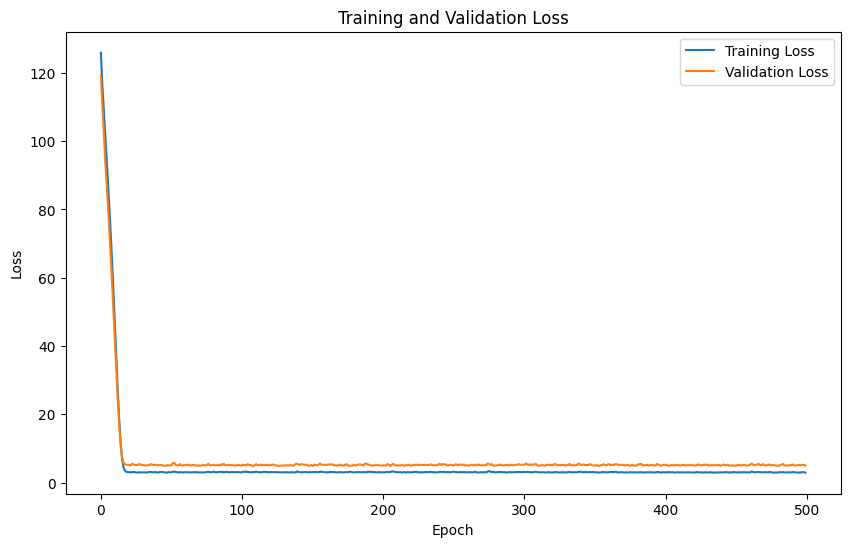

In [ ]:
import matplotlib.pyplot as plt
# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
